## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/employee_data_cleaned.csv')
pd.options.display.max_columns = None
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,0,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,0,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns[:5]

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department'], dtype='object')

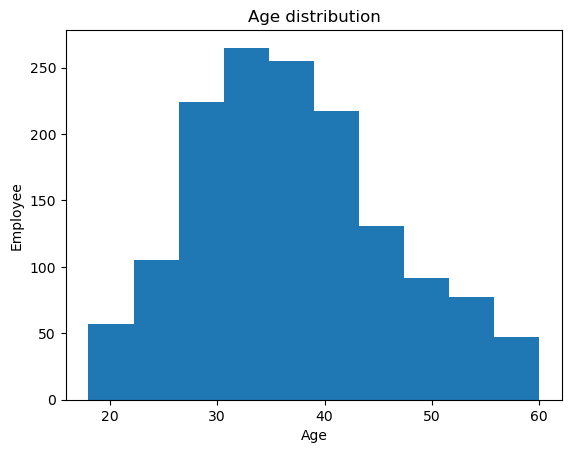

In [4]:
df.Age.plot(kind='hist', bins=10);
plt.title('Age distribution')
plt.ylabel('Employee')
plt.xlabel('Age')
plt.savefig('../image/eda_age.png')

In [5]:
df['Attrition'].map({1:'Yes', 0:'No'})

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [6]:
df['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

/Users/atigon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


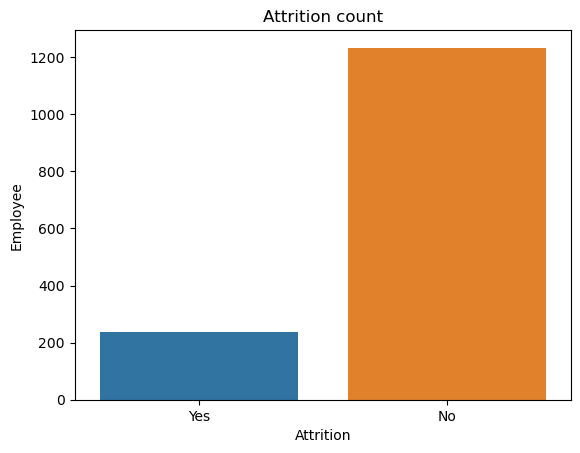

In [7]:
sns.countplot(df['Attrition'].map({1:'Yes', 0:'No'}));
plt.title('Attrition count');
plt.ylabel('Employee')
plt.savefig('../image/eda_attrition')

In [8]:
df.BusinessTravel.value_counts(normalize=True)

1    0.897959
0    0.102041
Name: BusinessTravel, dtype: float64

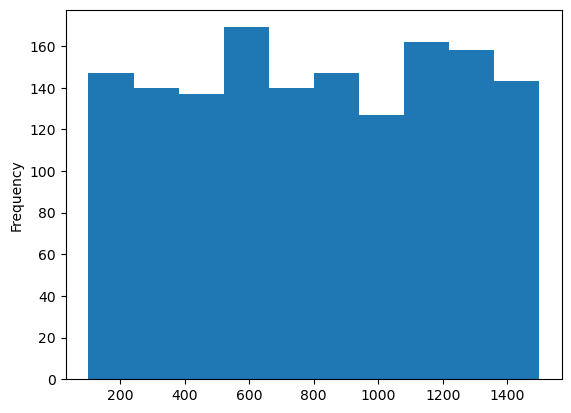

In [9]:
df.DailyRate.plot(kind='hist');

In [10]:
df.columns[:5]

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department'], dtype='object')

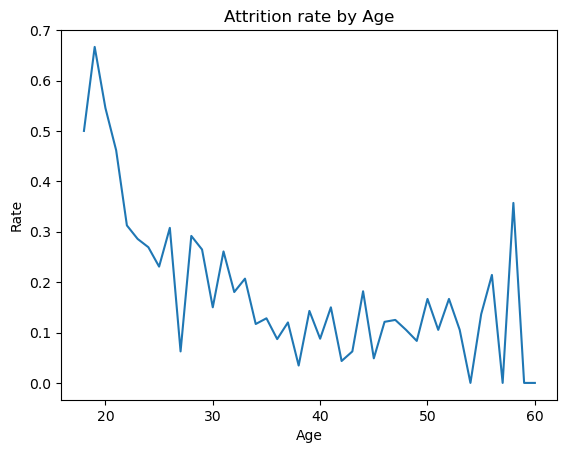

In [11]:
# Age
df.groupby(by='Age')['Attrition'].mean().plot(kind='line');
plt.title('Attrition rate by Age')
plt.ylabel('Rate')
plt.xlabel('Age')
plt.savefig('../image/eda_attrition_rate_by_age.png')
# This says we should group by
# 18-24 Very high (4)
# 25-34 High (3)
# 35-44 Low (1)
# 45-55 Medium (2)
# 55-60 High (3)

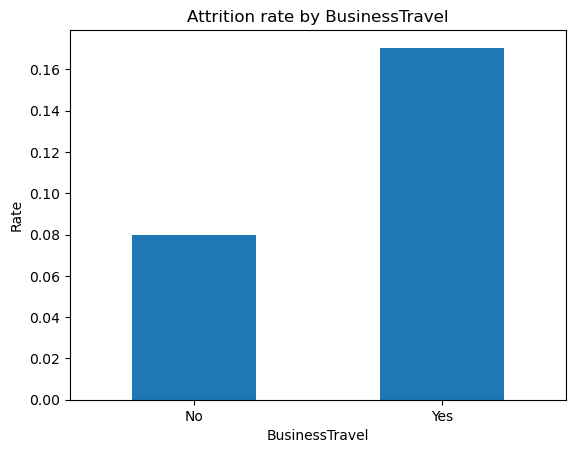

In [12]:
# BusinessTravel
df.groupby(by='BusinessTravel')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by BusinessTravel')
plt.ylabel('Rate')
plt.xlabel('BusinessTravel')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.savefig('../image/eda_attrition_rate_by_business_travel.png')
# Attrition goes double if employee have to travel

In [13]:
df['daily_rate_range'] = df['DailyRate'].map(lambda x: round(x/100)*100)

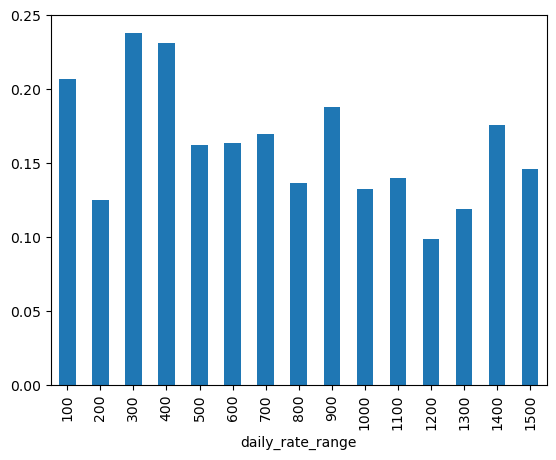

In [14]:
# DailyRate
df.groupby(by='daily_rate_range')['Attrition'].mean().plot(kind='bar');
# not significant much

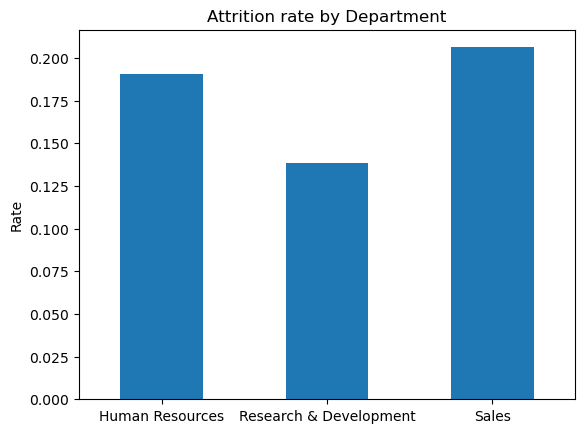

In [15]:
# Department
df.groupby(by='Department')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by Department')
plt.ylabel('Rate')
plt.xlabel('')
plt.xticks(rotation=0)
plt.savefig('../image/eda_attrition_rate_by_department.png')
# not significant much

In [16]:
df.columns[5:10]

Index(['DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber'],
      dtype='object')

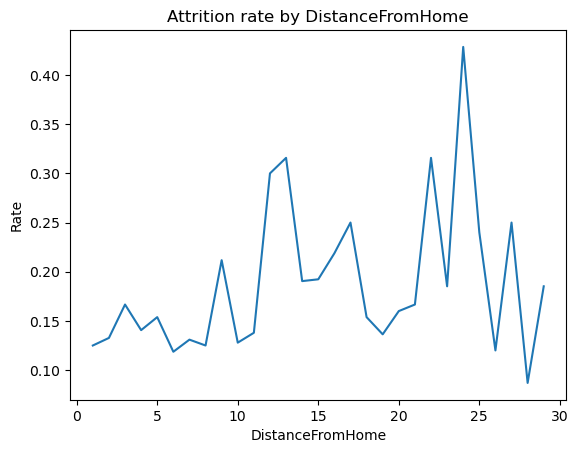

In [17]:
# DistanceFromHome
df.groupby(by='DistanceFromHome')['Attrition'].mean().plot(kind='line');
plt.title('Attrition rate by DistanceFromHome')
plt.ylabel('Rate')
plt.xlabel('DistanceFromHome')
plt.savefig('../image/eda_attrition_rate_by_distance_from_home.png')
# low 0-10
# med 11-20
# high 21-30

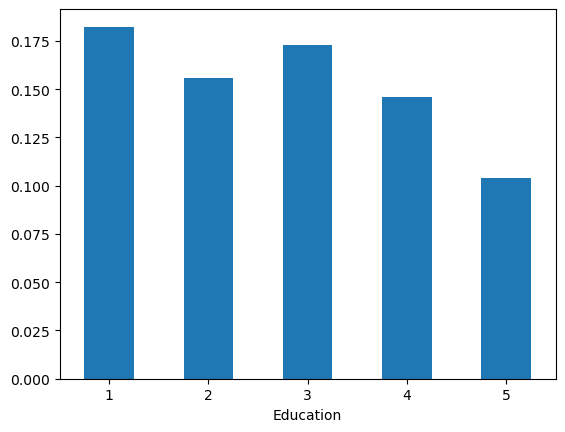

In [18]:
# Education
df.groupby(by='Education')['Attrition'].mean().plot(kind='bar');
plt.xticks(rotation=0);
# Ph.D. is lowest

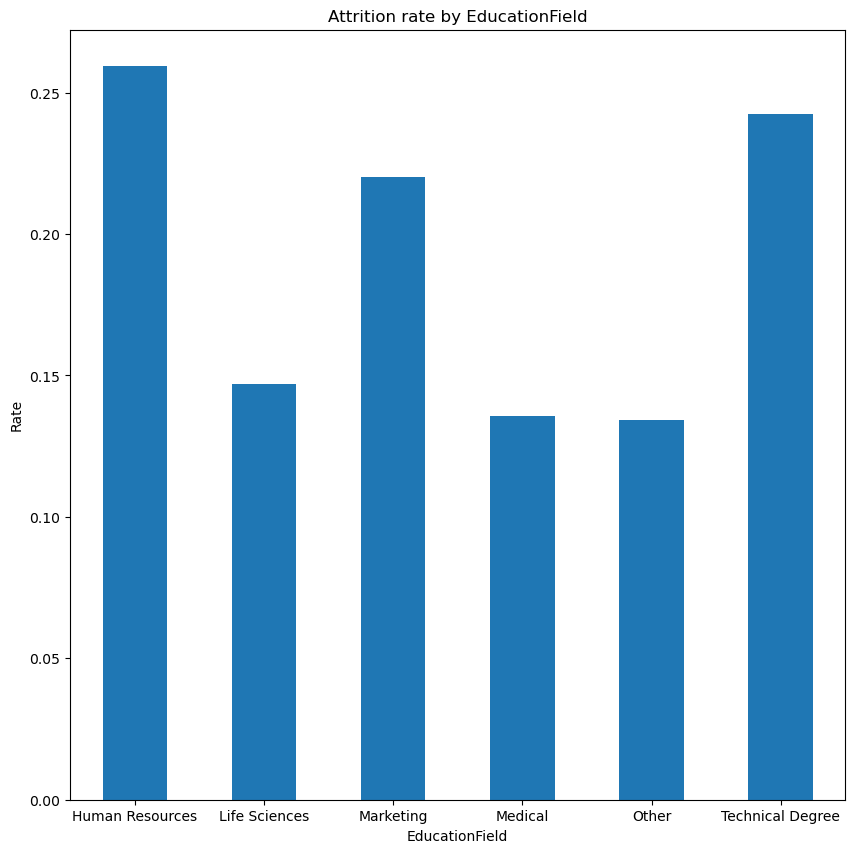

In [19]:
# EducationField
plt.figure(figsize=(10,10))
df.groupby(by='EducationField')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by EducationField')
plt.ylabel('Rate')
plt.xlabel('EducationField')
plt.xticks(rotation=0)
plt.savefig('../image/eda_attrition_rate_by_education_field.png')

In [20]:
# EmployeeCount
set(df['EmployeeCount'])

{1}

In [21]:
# will drop due to not useful
df = df.drop(columns='EmployeeCount');

In [22]:
# EmployeeNumber, will drop due to just a identification number.
df = df.drop(columns='EmployeeNumber')

In [23]:
df.columns[10:15].values

array(['HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction'], dtype=object)

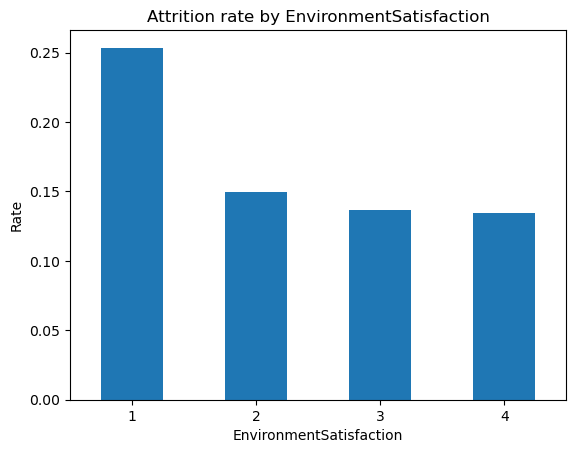

In [24]:
# EnvironmentSatisfaction
df.groupby(by='EnvironmentSatisfaction')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by EnvironmentSatisfaction')
plt.ylabel('Rate')
plt.xlabel('EnvironmentSatisfaction')
plt.xticks(rotation=0)
plt.savefig('../image/eda_attrition_rate_by_environment_satisfaction.png')
# level 1 highly related

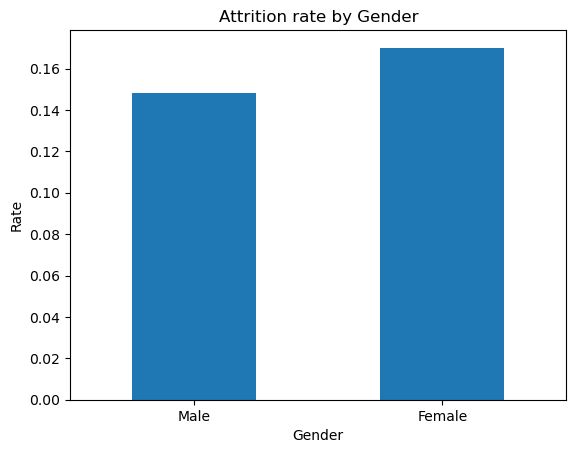

In [25]:
# Gender
df.groupby(by='Gender')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by Gender')
plt.ylabel('Rate')
plt.xlabel('Gender')
plt.xticks([1, 0],['Female', 'Male'],rotation=0)
plt.savefig('../image/eda_attrition_rate_by_gender.png')

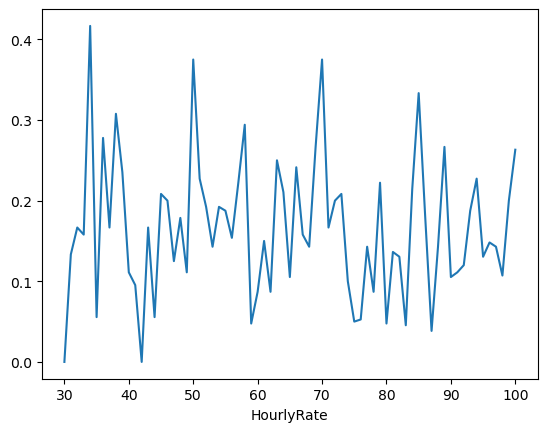

In [26]:
# HourlyRate
df.groupby(by='HourlyRate')['Attrition'].mean().plot(kind='line');
# not related

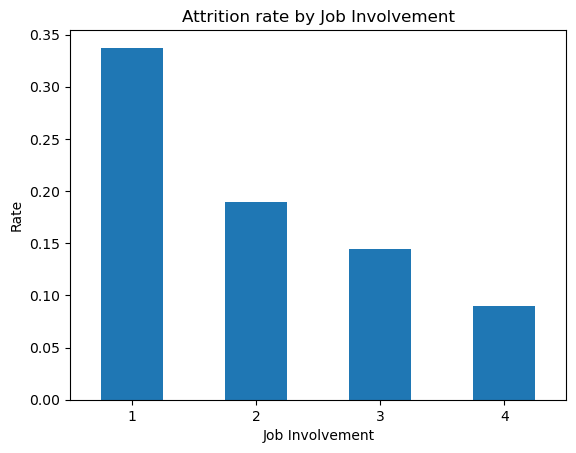

In [27]:
# JobInvolvement
df.groupby(by='JobInvolvement')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by Job Involvement')
plt.ylabel('Rate')
plt.xlabel('Job Involvement')
plt.xticks(rotation=0)
plt.savefig('../image/eda_attrition_rate_by_job_involvement.png')
# level 1 - highly related, level 2-3 - medium related, level 4 - low related

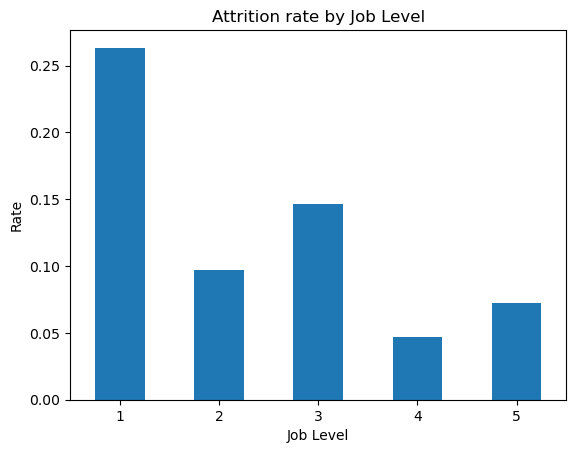

In [28]:
# JobLevel
df.groupby(by='JobLevel')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by Job Level')
plt.ylabel('Rate')
plt.xlabel('Job Level')
plt.xticks(rotation=0)
plt.savefig('../image/eda_attrition_rate_by_job_level.png')
# level 1 - related

In [29]:
df.columns[15:20].values

array(['MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18'], dtype=object)

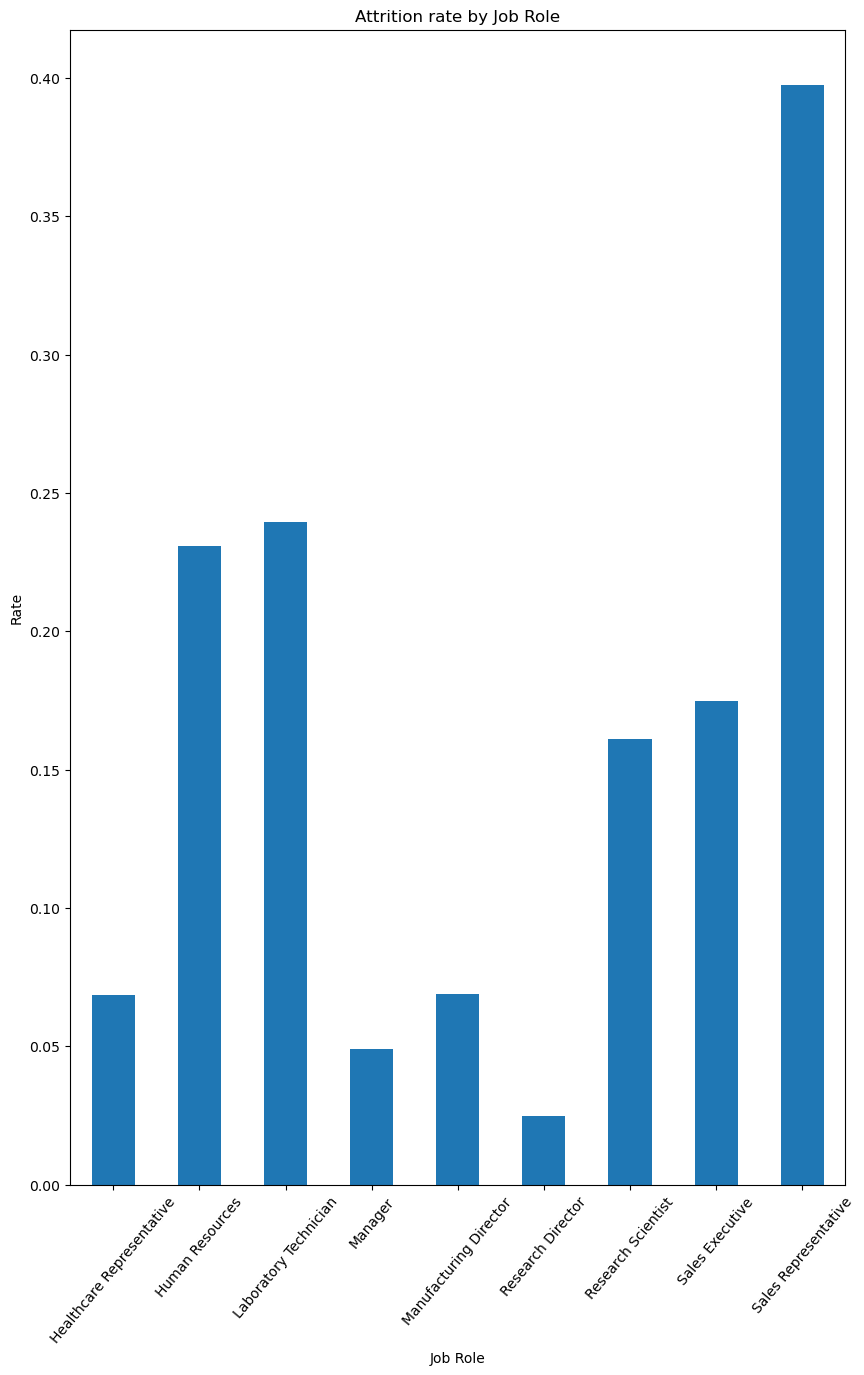

In [30]:
# JobRole
plt.figure(figsize=(10,15))
df.groupby(by='JobRole')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by Job Role')
plt.ylabel('Rate')
plt.xlabel('Job Role')
plt.xticks(rotation=50)
plt.savefig('../image/eda_attrition_rate_by_job_role.png')
# high - sales_rep
# med - hr, lab_tec, res_sci, sales_exec
# low - hea_rep, mgr, man_dir, res_dir

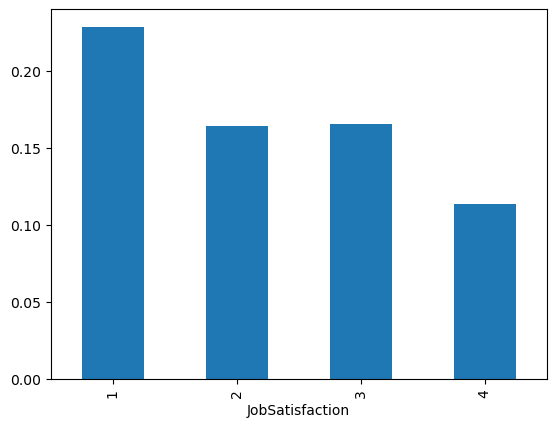

In [31]:
# JobSatisfaction
df.groupby(by='JobSatisfaction')['Attrition'].mean().plot(kind='bar');
# level 1 - related

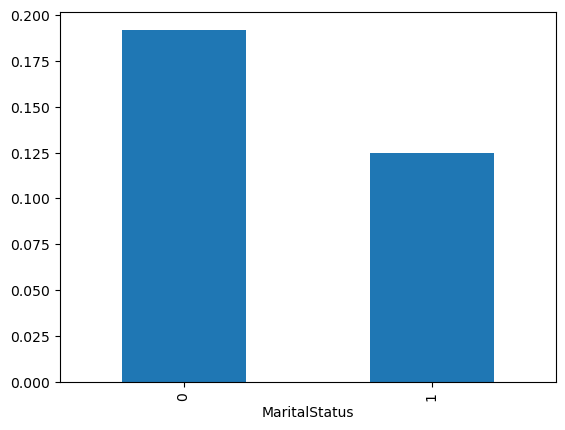

In [32]:
# MaritalStatus
df.groupby(by='MaritalStatus')['Attrition'].mean().plot(kind='bar');
# single related

In [33]:
def salary_range(salary):
    if salary<2500:
        return 1250
    elif salary<5000:
        return 3750
    elif salary<7500:
        return 6250
    elif salary<10000:
        return 8750
    elif salary<12500:
        return 11250
    elif salary<15000:
        return 13750
    elif salary<17500:
        return 16250
    elif salary<20000:
        return 18750
    elif salary<25000:
        return 21250
    else:
        return 23750

In [34]:
df['salary_range'] = df['MonthlyIncome'].apply(salary_range)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,daily_rate_range,salary_range
0,41,1,1,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,0,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,1100,6250
1,49,0,1,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,300,6250
2,37,1,1,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,0,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,1400,1250
3,33,0,1,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,1400,3750
4,27,0,1,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,600,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,2,Medical,3,1,41,4,2,Laboratory Technician,4,1,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3,900,3750
1466,39,0,1,613,Research & Development,6,1,Medical,4,1,42,2,3,Healthcare Representative,1,1,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7,600,8750
1467,27,0,1,155,Research & Development,4,3,Life Sciences,2,1,87,4,2,Manufacturing Director,2,1,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3,200,6250
1468,49,0,1,1023,Sales,2,3,Medical,4,1,63,2,2,Sales Executive,2,1,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8,1000,6250


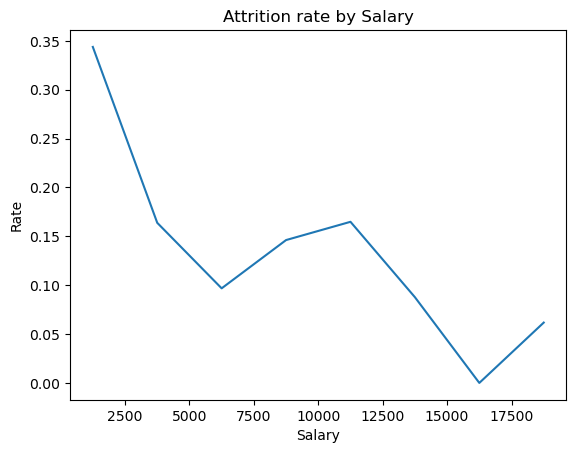

In [35]:
# MonthlyIncome
df.groupby(by='salary_range')['Attrition'].mean().plot(kind='line');
# low salary matter
plt.title('Attrition rate by Salary')
plt.ylabel('Rate')
plt.xlabel('Salary')
plt.xticks(rotation=0)
plt.savefig('../image/eda_attrition_rate_by_salary.png')

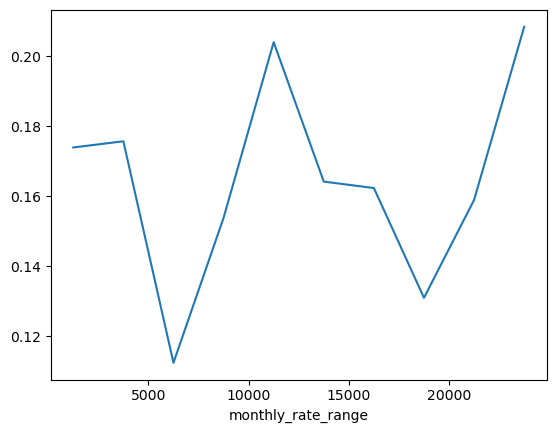

In [36]:
# MonthlyRate
df['monthly_rate_range'] = df['MonthlyRate'].apply(salary_range)

df.groupby(by='monthly_rate_range')['Attrition'].mean().plot(kind='line');
# no significant relations

In [37]:
df.columns[20:25].values

array(['OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours'], dtype=object)

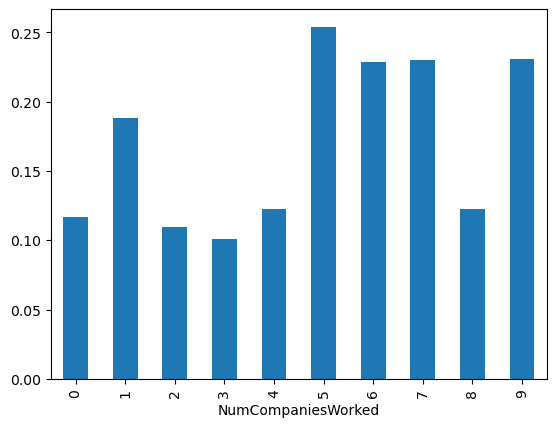

In [38]:
# NumCompaniesWorked
df.groupby(by='NumCompaniesWorked')['Attrition'].mean().plot(kind='bar');

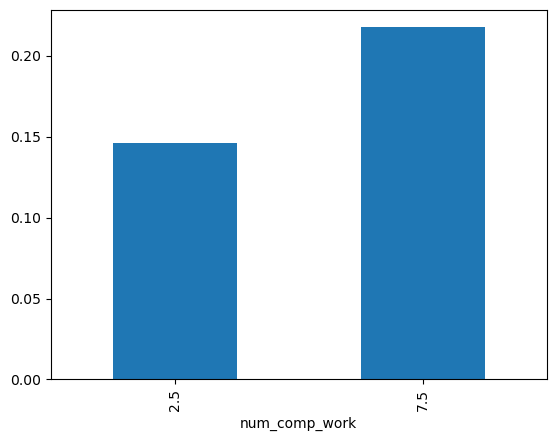

In [39]:
df['num_comp_work'] = df['NumCompaniesWorked'].map(lambda x: 2.5 if x < 5 else 7.5)
df.groupby(by='num_comp_work')['Attrition'].mean().plot(kind='bar');

In [40]:
df.NumCompaniesWorked.value_counts(normalize=True)

1    0.354422
0    0.134014
3    0.108163
2    0.099320
4    0.094558
7    0.050340
6    0.047619
5    0.042857
9    0.035374
8    0.033333
Name: NumCompaniesWorked, dtype: float64

In [41]:
# Over18
print(df['Over18'].value_counts(normalize=True))

# All rows are over 18, will drop this
df.drop(columns='Over18', inplace=True)

Y    1.0
Name: Over18, dtype: float64


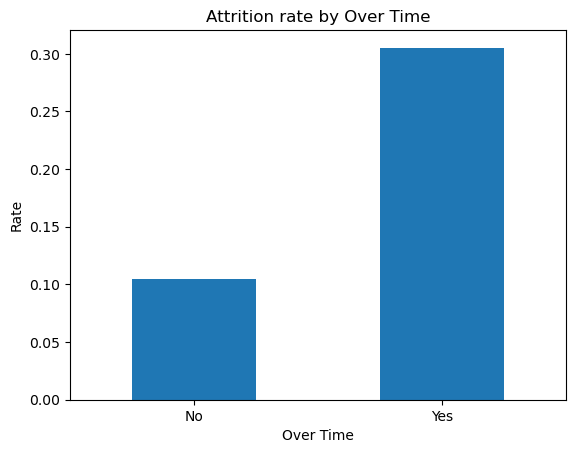

In [42]:
# OverTime
df.groupby(by='OverTime')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by Over Time')
plt.ylabel('Rate')
plt.xlabel('Over Time')
plt.xticks([0, 1],['No', 'Yes'],rotation=0)
plt.savefig('../image/eda_attrition_rate_by_over_time.png')
# Very high related

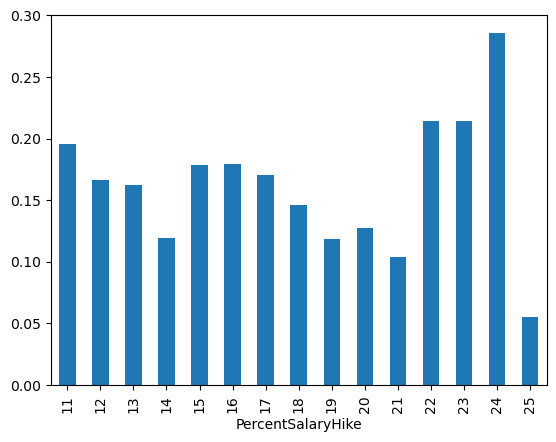

In [43]:
# PercentSalaryHike
df.groupby(by='PercentSalaryHike')['Attrition'].mean().plot(kind='bar');
# no significant relations

{3, 4}


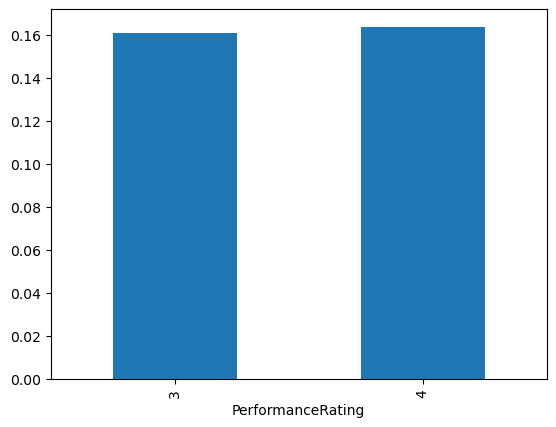

In [44]:
# PerformanceRating
df.groupby(by='PerformanceRating')['Attrition'].mean().plot(kind='bar');
print(set(df['PerformanceRating']))
# no significant relations

In [45]:
df.columns[25:30].values

array(['TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole'], dtype=object)

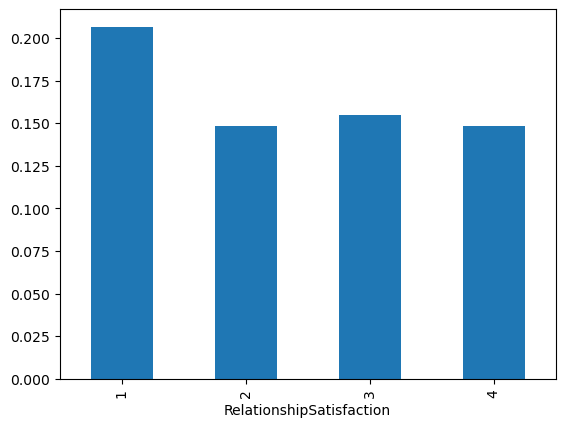

In [46]:
# RelationshipSatisfaction
df.groupby(by='RelationshipSatisfaction')['Attrition'].mean().plot(kind='bar');

In [47]:
# StandardHours
df.StandardHours.value_counts(normalize=True)

# All are the same, will drop this column
df.drop(columns='StandardHours', inplace=True)

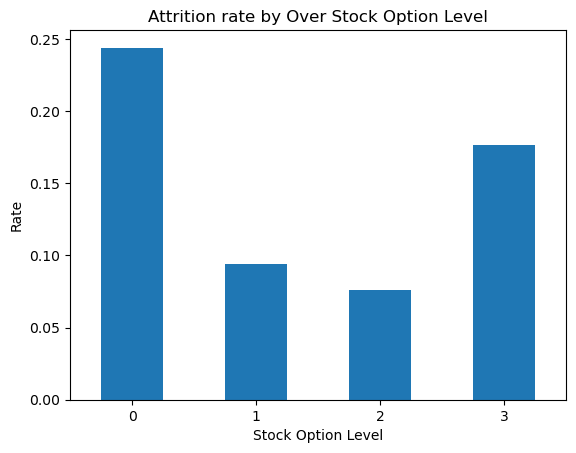

In [48]:
# StockOptionLevel
df.groupby(by='StockOptionLevel')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by Over Stock Option Level')
plt.ylabel('Rate')
plt.xlabel('Stock Option Level')
plt.xticks(rotation=0)
plt.savefig('../image/eda_attrition_rate_by_stock_option_level.png')
# low & high stock option are related

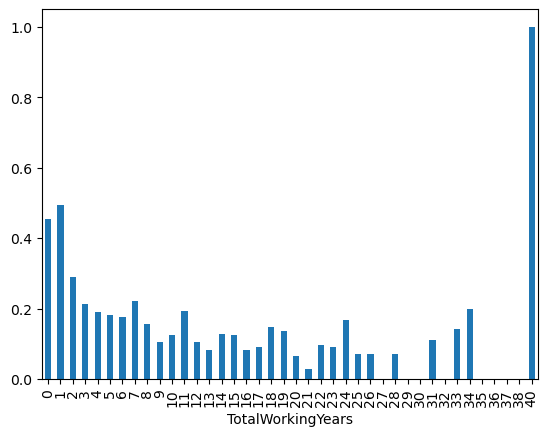

In [49]:
# TotalWorkingYears
df.groupby(by='TotalWorkingYears')['Attrition'].mean().plot(kind='bar');
# 0-2 years matter
# over 35 years super matter 100% stays
# 40 years should be remove
df = df[df['TotalWorkingYears']!=40]

In [50]:
df[df['TotalWorkingYears']>=35]['Attrition'].value_counts()

0    14
Name: Attrition, dtype: int64

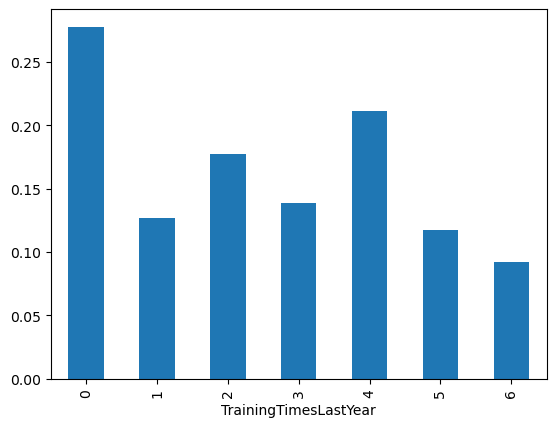

In [51]:
# TrainingTimesLastYear
df.groupby(by='TrainingTimesLastYear')['Attrition'].mean().plot(kind='bar');
# Zero training time matters

In [52]:
df.columns[30:35].values

array(['YearsWithCurrManager', 'daily_rate_range', 'salary_range',
       'monthly_rate_range', 'num_comp_work'], dtype=object)

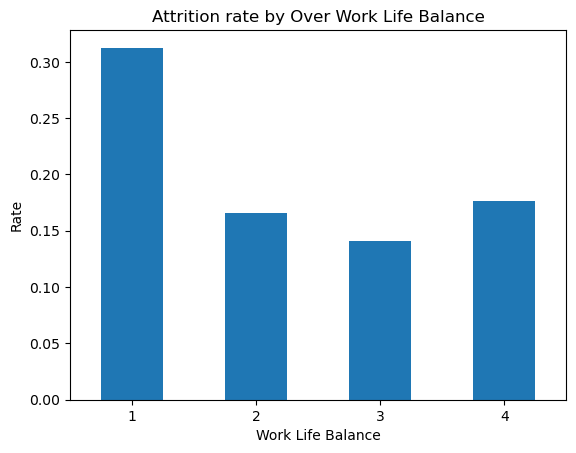

In [53]:
# WorkLifeBalance
df.groupby(by='WorkLifeBalance')['Attrition'].mean().plot(kind='bar');
plt.title('Attrition rate by Over Work Life Balance')
plt.ylabel('Rate')
plt.xlabel('Work Life Balance')
plt.xticks(rotation=0)
plt.savefig('../image/eda_attrition_rate_by_work_life_balance.png')
# work life balance matters at double

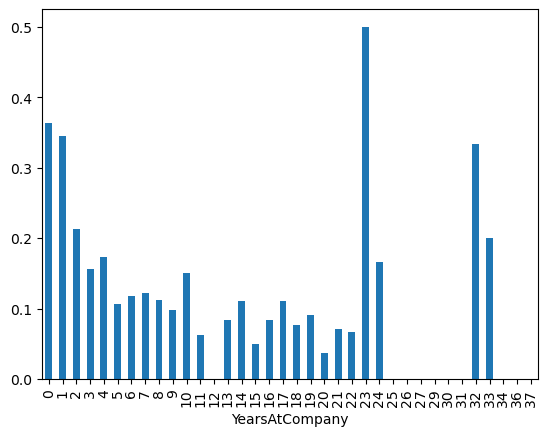

In [54]:
# YearsAtCompany
df.groupby(by='YearsAtCompany')['Attrition'].mean().plot(kind='bar');

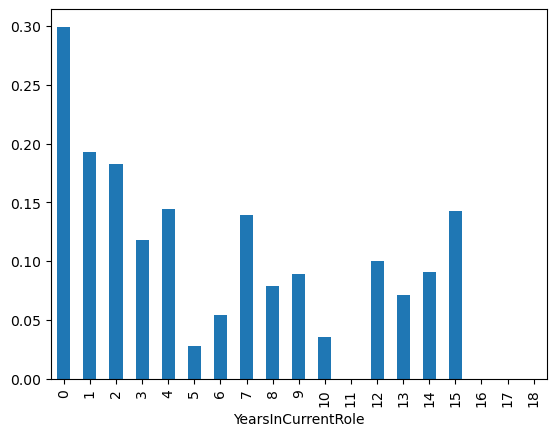

In [55]:
# YearsInCurrentRole
df.groupby(by='YearsInCurrentRole')['Attrition'].mean().plot(kind='bar');
# First year matter

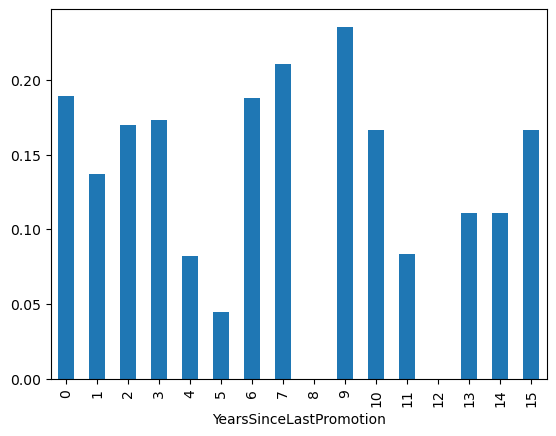

In [56]:
# YearsSinceLastPromotion
df.groupby(by='YearsSinceLastPromotion')['Attrition'].mean().plot(kind='bar');

# No significant

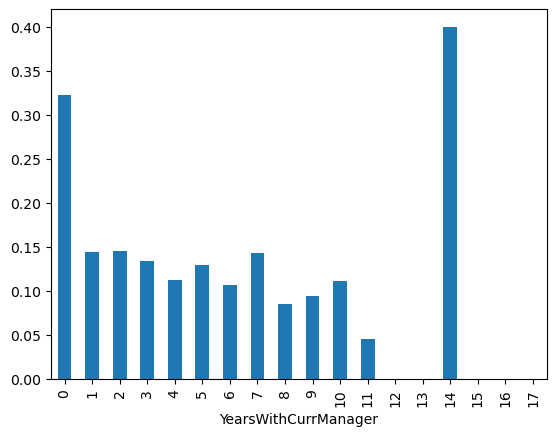

In [57]:
# YearsWithCurrManager
df.groupby(by='YearsWithCurrManager')['Attrition'].mean().plot(kind='bar');
# First year matter then spike at exactly 14 years

In [58]:
df.to_csv('../data/employee_data_clean_eda.csv', index=False)